### Assignment - 3


In [1]:
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 1
#### one-hot encoding

In [2]:
def one_hot_encoding(input_data):
    
    y_category = ['0','1','2','3','4','5','6','7','8','9']
    df = pd.DataFrame({'y': y_category})
    df_one_hot = pd.get_dummies(input_data['y'], df) #using dummies to get one-hot encoding
    y = df_one_hot.as_matrix() #modifying y to numpy array   
    return y   # y shape : (3500, 10)

#### sigmoid function

In [3]:
def sigmoid(Z):     
    return 1/ (1 + np.exp(-Z))

#### forward propagation

In [4]:
def forward_propagation(W1,W2,X,b1,b2):
    
    Z1 = np.add(np.dot(W1, X.T) , b1) 
    A1 = sigmoid(Z1)
    Z2 = np.add(np.dot(W2,A1), b2)
    A2 = sigmoid(Z2)   
    return Z1, A1, Z2, A2
# shape: Z1=(25, 3500)   A1=(25, 3500)   Z2= (10, 3500)   A2=(10, 3500)

#### backward propagation function

In [5]:
def backward_propagation(m, A2,A1, W2, X, y):
    dZ2 = np.subtract(A2, y.T)  # shape (10,3500)
    dW2 = (1/m)*(np.dot(dZ2 , A1.T))   # shape (10,25)
    db2 = (1/m)*(np.sum(dZ2, axis = 1, keepdims = True)) # shape (10,1)
        
    dA1= np.dot(dZ2.T, W2)   # shape (25,3500)
    dZ1 = np.multiply(dA1.T, np.multiply(A1, (1- A1))) # shape (25, 3500)
    dW1 = (1/m)*(np.dot(dZ1, X))    # shape (25, 400)
    db1 = (1/m)*(np.sum(dZ1, axis = 1, keepdims = True))  # shape (25,1)
       
    return dZ1, dZ2, dW1, dW2, db1, db2

#### gradient descent

In [6]:
def gradient_descent(W1, b1, db1, dW1, W2, b2, db2, dW2, alpha):   
    W1_new = W1 - (alpha * dW1)
    b1_new = b1 - (alpha * db1)
    W2_new = W2 - (alpha * dW2)
    b2_new = b2 - (alpha * db2)
    return W1_new, b1_new, W2_new, b2_new

#### softmax sunction

In [7]:
def softmax(x):
    denom_soft = np.sum(np.exp(x), axis = 1)
    pk =  np.exp(x) /(denom_soft).reshape(denom_soft.shape[0],1)
    return pk

### 2 
#### split data

In [8]:
def split_data():
    data_train = pd.read_csv('ex3_train.csv') #loading data
    X_train = data_train.iloc[:,0:400] #X shape: (3500,400)
    m = X_train.shape[0] #m = 3500
    y_train = data_train.iloc[:,-1]
    y_train_one_hot = one_hot_encoding(data_train) #one-hot-encoded y
    
    data_test = pd.read_csv('ex3_test.csv')
    X_test = data_test.iloc[:,0:400]
    y_test_one_hot = one_hot_encoding(data_test) #one_hot encoded y
    y_test = data_test.iloc[:,-1]
    
    return X_train, y_train_one_hot,y_train, X_test, y_test_one_hot,y_test, m

### 3
#### initializing parameters

In [9]:
def initialize_variables(input_layer_size = 400, hidden_layer_size = 25 , output_layer_size = 10):    
    np.random.seed(1)
    W1 = 0.01 * np.random.randn(hidden_layer_size,input_layer_size)
    b1 = np.zeros((hidden_layer_size,1))
    W2 = 0.01 *(np.random.randn(output_layer_size, hidden_layer_size))
    b2 = np.zeros((output_layer_size,1))
    return W1, W2, b1, b2
# shape : W1(25, 400)   W2(10, 25)   b1(25, 1)   b2(10, 1)

### 4 
#### neural network model with one hidden layer

In [10]:
#all in one function :
def neural_network_model(X,y,m, precision, alpha, max_iteration = 10000 ):  
    
    costs = []
    
    W1, W2, b1, b2 = initialize_variables(input_layer_size= 400, hidden_layer_size= 25, output_layer_size= 10)
    
    old_cost = 0

    iters = 0
    iterations_graph = []
    converge=False  
    
    while iters < max_iteration or not converge:       
        #forward propagation for input layer and hidden layer
        Z1, A1, Z2, A2 = forward_propagation(W1,W2,X,b1,b2)       
        new_cost = (-1/m)* np.sum(np.multiply(y, np.log(A2.T) + np.multiply(1-y, np.log(1-A2.T)))) 
#         print ("new_cost: ", new_cost)
                
        if abs(old_cost - new_cost)<= precision:
            converge = True
            print "model converged"
            break
        old_cost = new_cost
        iters = iters + 1
        costs.append(new_cost)
        iterations_graph.append(iters)
        if iters >= max_iteration :
            print "Exceeded maximum number of iterations"
            break 
                    
        #backward propagation for both layers
        dZ1, dZ2, dW1, dW2, db1, db2 = backward_propagation(m, A2,A1,W2, X, y)
                
        #updating weights using gradient
        
        W1, b1, W2, b2 = gradient_descent(W1, b1, db1, dW1, W2, b2, db2, dW2, alpha) 
        
#         print ("iterations : " ,iters ) 
        
    
    return new_cost,costs, W1, W2, b1, b2 , A2, iterations_graph

### Optimizations and Predictions


In [11]:
def accuracy(y_pred, y):
    m = len(y)
    matches =0 
    acc = 0
    for i in range(m):       
        if( y_pred[i] == y[i] ):
            matches +=1 
            
    acc = ((matches /m) * 100)
    return (acc)

In [12]:
X_train, y_train_one_hot,y_train ,X_test, y_test_one_hot,y_test, m = split_data() #getting split data
X = X_train
y = y_train_one_hot

#### training model when alpha = 0.001

In [13]:
precision = 0.000001
alpha = 0.001
new_cost1,costs1, W1_train, W2_train, b1_train, b2_train , A2_train,iters1 = neural_network_model(X,y,m, precision, alpha, max_iteration = 1000 )

Exceeded maximum number of iterations


In [14]:
"Predictions"

A2_soft = softmax(A2_train)        #  shape A2_soft(10, 3500)
y_pred = np.argmax(A2_soft.T, axis = 1).reshape(A2_soft.T.shape[0],1)
acc = accuracy(y_pred , y_train)
print "accuracy when alpha 0.001= ", acc

accuracy when alpha 0.001=  26.9714285714


#### testing model when alpha = 0.001

In [15]:
#forward propagation of testing model
Z1_test, A1_test, Z2_test, A2_test = forward_propagation(W1_train,W2_train,X_test,b1_train,b2_train)
A2_test_soft = softmax(A2_test) 
y_pred = np.argmax(A2_test_soft.T, axis = 1).reshape(A2_test_soft.T.shape[0],1)
acc_test = accuracy(y_pred , y_test)
print "accuracy of test data when alpha 0.001= ", acc_test

accuracy of test data when alpha 0.001=  26.1333333333


#### training model with alpha = 0.01

In [16]:
precision = 0.000001
alpha = 0.01
new_cost2,costs2, W1_train, W2_train, b1_train, b2_train , A2_train,iters2 = neural_network_model(X,y,m, precision, alpha, max_iteration = 1000 )

model converged


In [17]:
"Predictions"

A2_soft = softmax(A2_train)        #  shape A2_soft(10, 3500)
y_pred = np.argmax(A2_soft.T, axis = 1).reshape(A2_soft.T.shape[0],1)
acc = accuracy(y_pred , y_train)
print "accuracy when alpha 0.001= ", acc

accuracy when alpha 0.001=  43.6285714286


#### testing model with alpha = 0.01

In [18]:
#forward propagation of testing model
Z1_test, A1_test, Z2_test, A2_test = forward_propagation(W1_train,W2_train,X_test,b1_train,b2_train)
A2_test_soft = softmax(A2_test) 
y_pred = np.argmax(A2_test_soft.T, axis = 1).reshape(A2_test_soft.T.shape[0],1)
acc_test = accuracy(y_pred , y_test)
print "accuracy of test data when alpha 0.001= ", acc_test

accuracy of test data when alpha 0.001=  43.7333333333


#### training model when alpha = 0.1

In [19]:
precision = 0.000001
alpha = 0.1
new_cost3 , costs3, W1_train, W2_train, b1_train, b2_train , A2_train, iters3 = neural_network_model(X,y,m, precision, alpha, max_iteration = 1000 )

Exceeded maximum number of iterations


In [20]:
A2_soft = softmax(A2_train)        #  shape A2_soft(10, 3500)
y_pred = np.argmax(A2_soft.T, axis = 1).reshape(A2_soft.T.shape[0],1)
acc = accuracy(y_pred , y_train)
print "accuracy when alpha 0.1= ", acc

accuracy when alpha 0.1=  79.5428571429


#### testing model when alpha = 0.1

In [21]:
"Prediction"
#forward propagation of testing model
Z1_test, A1_test, Z2_test, A2_test = forward_propagation(W1_train,W2_train,X_test,b1_train,b2_train)

A2_test_soft = softmax(A2_test)  #softmax
y_pred = np.argmax(A2_test_soft.T, axis = 1).reshape(A2_test_soft.T.shape[0],1)
acc_test = accuracy(y_pred , y_test)
print "accuracy of test data when alpha 0.1= ", acc_test

accuracy of test data when alpha 0.1=  80.4


#### training model when alpha = 1

In [22]:
precision = 0.000001
alpha = 1
new_cost4 ,costs4, W1_train, W2_train, b1_train, b2_train , A2_train,iters4 = neural_network_model(X,y,m, precision, alpha, max_iteration = 1000 )

Exceeded maximum number of iterations


In [23]:
A2_soft = softmax(A2_train)        #  shape A2_soft(10, 3500)
y_pred = np.argmax(A2_soft.T, axis = 1).reshape(A2_soft.T.shape[0],1)
acc = accuracy(y_pred , y_train)
print "accuracy when alpha 1= ", acc

accuracy when alpha 1=  96.3142857143


#### testing model when alpha = 1

In [24]:
"Predictions"

Z1_test, A1_test, Z2_test, A2_test = forward_propagation(W1_train,W2_train,X_test,b1_train,b2_train)

A2_test_soft = softmax(A2_test)  #softmax
y_pred = np.argmax(A2_test_soft.T, axis = 1).reshape(A2_test_soft.T.shape[0],1)
acc_test = accuracy(y_pred , y_test)
print "accuracy of test data when alpha 1= ", acc_test

accuracy of test data when alpha 1=  92.3333333333


#### training model when alpha = 1.5

In [25]:
precision = 0.000001
alpha = 1.5
new_cost5, costs5, W1_train, W2_train, b1_train, b2_train , A2_train, iters5 = neural_network_model(X,y,m, precision, alpha, max_iteration = 1000 )

Exceeded maximum number of iterations


In [26]:
"Predictions"

A2_soft = softmax(A2_train)        #  shape A2_soft(10, 3500)
y_pred = np.argmax(A2_soft.T, axis = 1).reshape(A2_soft.T.shape[0],1)
acc = accuracy(y_pred , y_train)
print "accuracy when alpha 1.5 = ", acc

accuracy when alpha 1.5 =  97.6857142857


#### testing model when alpha = 1.5

In [27]:
Z1_test, A1_test, Z2_test, A2_test = forward_propagation(W1_train,W2_train,X_test,b1_train,b2_train)
A2_test_soft = softmax(A2_test) 
y_pred = np.argmax(A2_test_soft.T, axis = 1).reshape(A2_test_soft.T.shape[0],1)
acc_best = accuracy(y_pred , y_test)
print "accuracy of test data when alpha 1.5 = ", acc_best

accuracy of test data when alpha 1.5 =  92.8


#### training model when alpha = 2

In [28]:
precision = 0.000001
alpha = 2.0
new_cost6, costs6, W1_train, W2_train, b1_train, b2_train , A2_train, iters6 = neural_network_model(X,y,m, precision, alpha, max_iteration = 1000 )

Exceeded maximum number of iterations


In [29]:
A2_soft = softmax(A2_train)        #  shape A2_soft(10, 3500)
y_pred = np.argmax(A2_soft.T, axis = 1).reshape(A2_soft.T.shape[0],1)
acc = accuracy(y_pred , y_train)
print "accuracy when alpha 1.5 = ", acc

accuracy when alpha 1.5 =  98.0285714286


#### testing model when alpha = 2

In [30]:
"Predictions"

Z1_test, A1_test, Z2_test, A2_test = forward_propagation(W1_train,W2_train,X_test,b1_train,b2_train)
A2_test_soft = softmax(A2_test) 
y_pred = np.argmax(A2_test_soft.T, axis = 1).reshape(A2_test_soft.T.shape[0],1)
acc_test = accuracy(y_pred , y_test)
print "accuracy of test data when alpha 1.5 = ", acc_test

accuracy of test data when alpha 1.5 =  91.9333333333


#### Plotting cost versus number of iteration with different learning rate for training data set

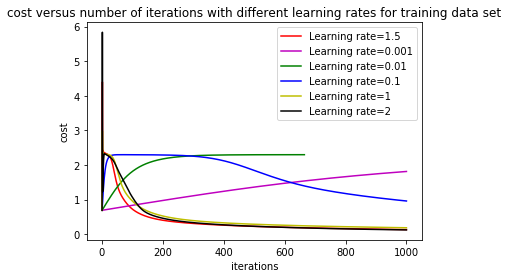

In [31]:
fig = plt.figure()

ax = fig.add_subplot(111)

ax.set_title("cost versus number of iterations with different learning rates for training data set")

ax.set_xlabel("iterations")
ax.set_ylabel("cost")

plt.plot(iters5, costs5, 'r', label='Learning rate=1.5')
plt.plot(iters1, costs1, 'm', label='Learning rate=0.001')
plt.plot(iters2, costs2, 'g', label='Learning rate=0.01')
plt.plot(iters3, costs3, 'b', label='Learning rate=0.1')
plt.plot(iters4, costs4, 'y', label='Learning rate=1')
plt.plot(iters6, costs6, 'k', label='Learning rate=2')

ax.legend()
plt.show()

In [33]:
print "Best accuracy of test data when alpha 1.5 = ", acc_best, "with number of iterations = ", len(iters5)

Best accuracy of test data when alpha 1.5 =  92.8 with number of iterations =  1000
